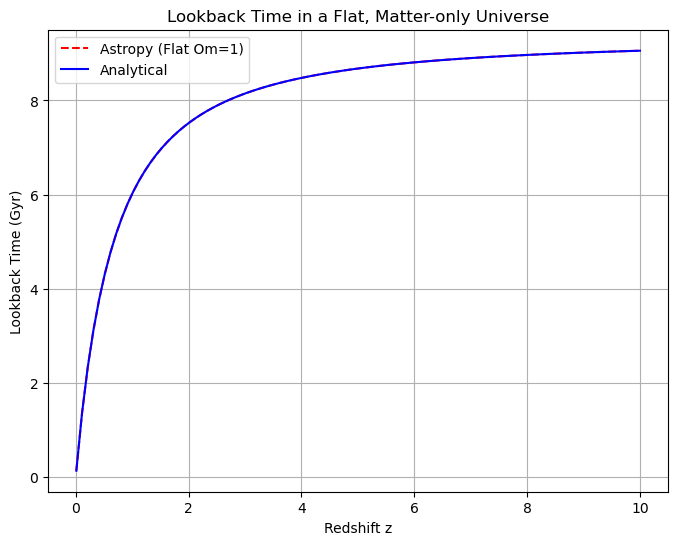

In [2]:
#1c
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
H0_value = 70.0  
cosmo = FlatLambdaCDM(H0=H0_value * u.km/u.s/u.Mpc, Om0=1.0)
z = np.linspace(0.01, 10, 100) 
lookback_astropy = cosmo.lookback_time(z).value  
H0_in_Gyr = (H0_value * u.km/u.s/u.Mpc).to(1/u.Gyr).value
lookback_analytic = (2/(3*H0_in_Gyr)) * (1 - (1+z)**(-1.5))

plt.figure(figsize=(8,6))
plt.plot(z, lookback_astropy, 'r--', label='Astropy (Flat Om=1)')
plt.plot(z, lookback_analytic, 'b-', label='Analytical')

plt.xlabel('Redshift z')
plt.ylabel('Lookback Time (Gyr)')
plt.title('Lookback Time in a Flat, Matter-only Universe')
plt.legend()
plt.grid(True)
plt.show()


Ryden eq. 6.31 is accurate to within 1% up to about z = 0.19


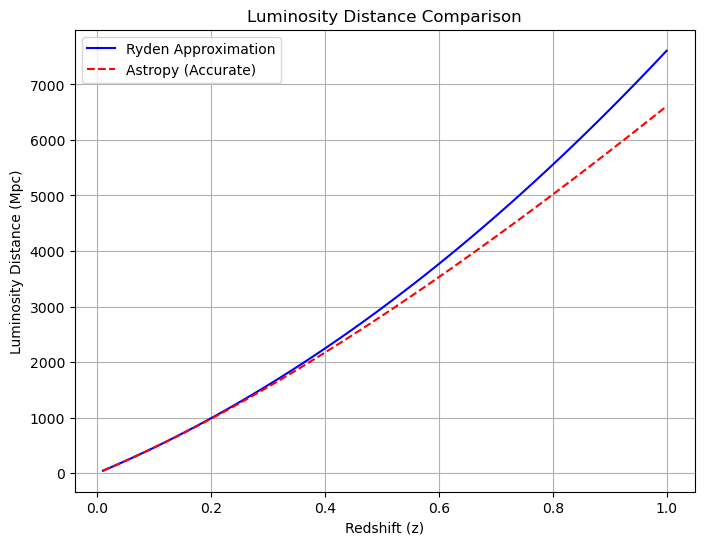

In [5]:
#3a & 3b
from astropy.cosmology import FlatLambdaCDM
from astropy import units as u
Om0 = 0.3
Ode0 = 0.7
H0 = 70.0  
c = 3e5 
cosmo = FlatLambdaCDM(H0=H0, Om0=Om0)
q0 = 0.5*Om0 - Ode0
def dL_ryden(z, H0, q0, c):
    return (c/H0) * z * (1 + ((1 - q0)/2.) * z)
z_values = np.linspace(0.01, 1.0, 100)
dL_approx = dL_ryden(z_values, H0, q0, c)
dL_astropy = cosmo.luminosity_distance(z_values).value  
percent_diff = 100 * (dL_astropy - dL_approx)/dL_astropy
within_1_percent = z_values[np.abs(percent_diff) < 1]
if len(within_1_percent) > 0:
    max_z_1_percent = np.max(within_1_percent)
    print(f"Ryden eq. 6.31 is accurate to within 1% up to about z = {max_z_1_percent:.2f}")
else:
    print("No redshift range found where the difference is within 1%")

plt.figure(figsize=(8,6))
plt.plot(z_values, dL_approx, label="Ryden Approximation", color="blue")
plt.plot(z_values, dL_astropy, label="Astropy (Accurate)", color="red", linestyle="--")
plt.xlabel("Redshift (z)")
plt.ylabel("Luminosity Distance (Mpc)")
plt.title("Luminosity Distance Comparison")
plt.legend()
plt.grid(True)
plt.show()
